In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from attention.utils.paths import path_training

In [2]:
plt.style.use('seaborn-bright')

In [3]:
def plot_training(type_category_set, version_weights, name):
    identifier = f'{type_category_set}_v{version_weights}'
    filenames = sorted([f for f in os.listdir(path_training) if identifier in f])
    if type_category_set == 'size':
        filenames = filenames[1:]
    num_category_sets = len(filenames)
    
    num_cols = 3
    width_ratio = 10
    shape_fig = (int(np.ceil(num_category_sets/num_cols)), num_cols)
    fig, ax = plt.subplots(*shape_fig, figsize=(4*num_cols, 0.8*num_category_sets))
    
    for i, filename in enumerate(filenames):
        df = pd.read_csv(path_training/filename, index_col=0)
        rowcol = np.unravel_index(i, shape_fig)
        ax[rowcol].plot(df['loss'], label='training')
        ax[rowcol].plot(df['val_loss'], '--', label='validation')
        ax[rowcol].set_title(f'{name} category set {i+1}')
        ax[rowcol].set_xlim((0, 300))
        ax[rowcol].set_xticks((0, 300))
        ylims = (
            round(min([df['loss'].min(), df['val_loss'].min()]), 1)-0.1,
            round(max([df['loss'].max(), df['val_loss'].max()]), 1)+0.1)
        ax[rowcol].set_ylim(ylims)
        ax[rowcol].set_yticks(ylims)
        ax[rowcol].legend()
        ax[rowcol].set_ylabel('Loss', labelpad=-10)
        ax[rowcol].set_xlabel('Epoch', labelpad=-10)
            
    for i in range(num_category_sets, np.prod(shape_fig)):
        rowcol = np.unravel_index(i, shape_fig)
        ax[rowcol].set_visible(False)
            
    plt.tight_layout()
#     plt.savefig(f'{identifier}_loss.pdf')
    return fig, ax

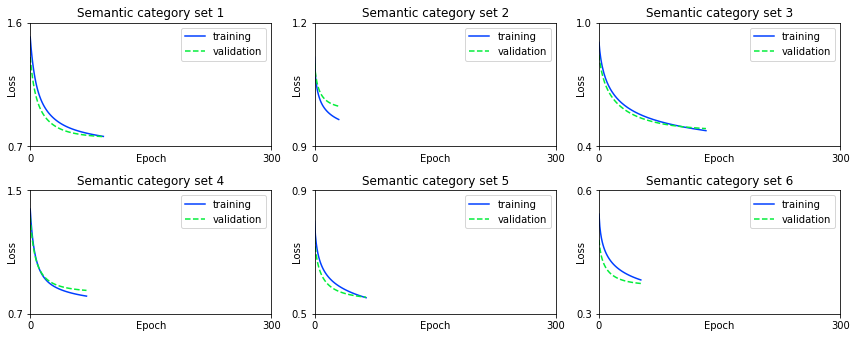

In [4]:
plot_training('sem', 9, 'Semantic');

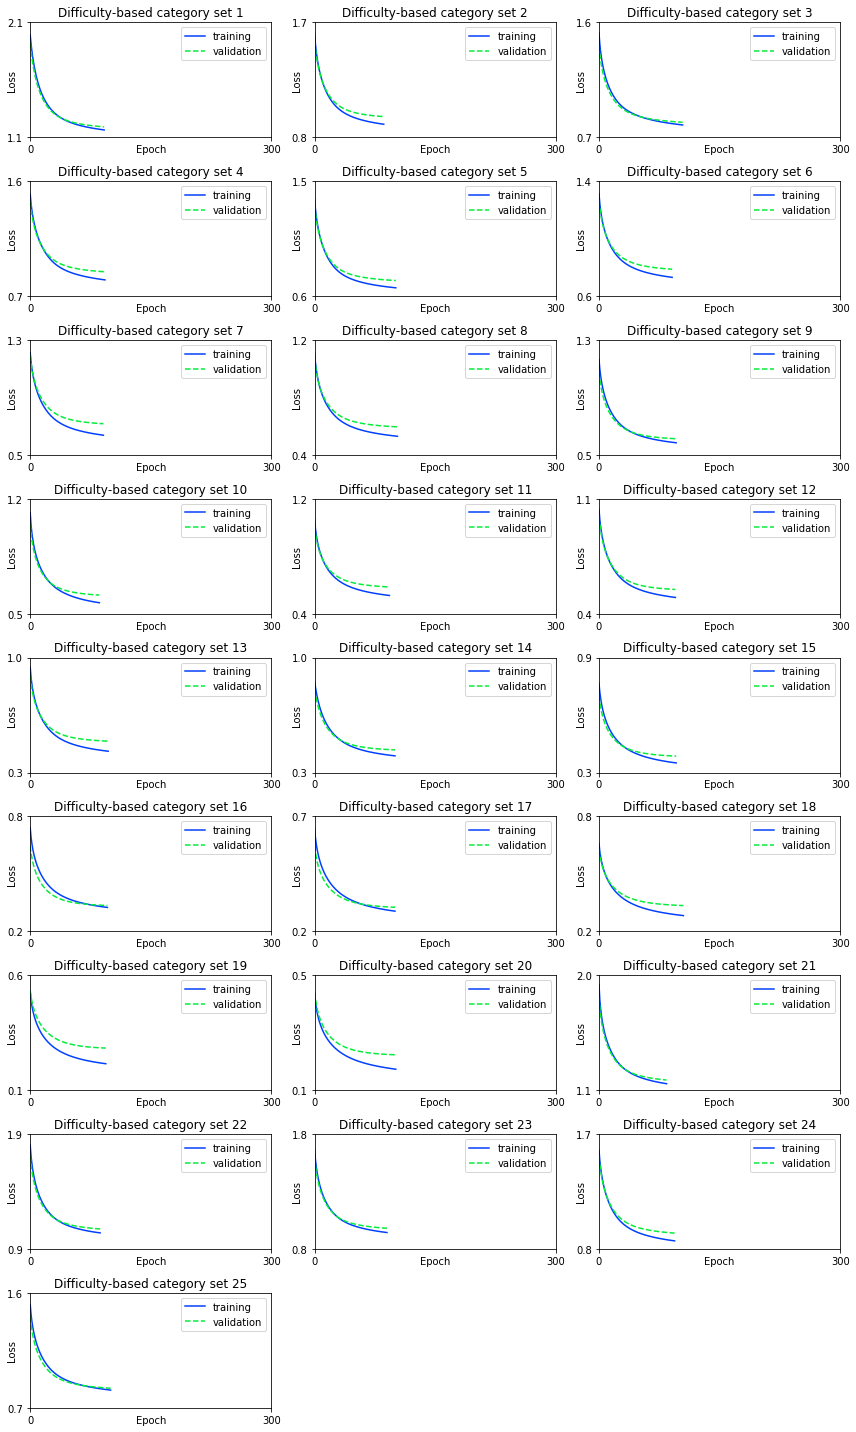

In [5]:
plot_training('diff', 3, 'Difficulty-based');

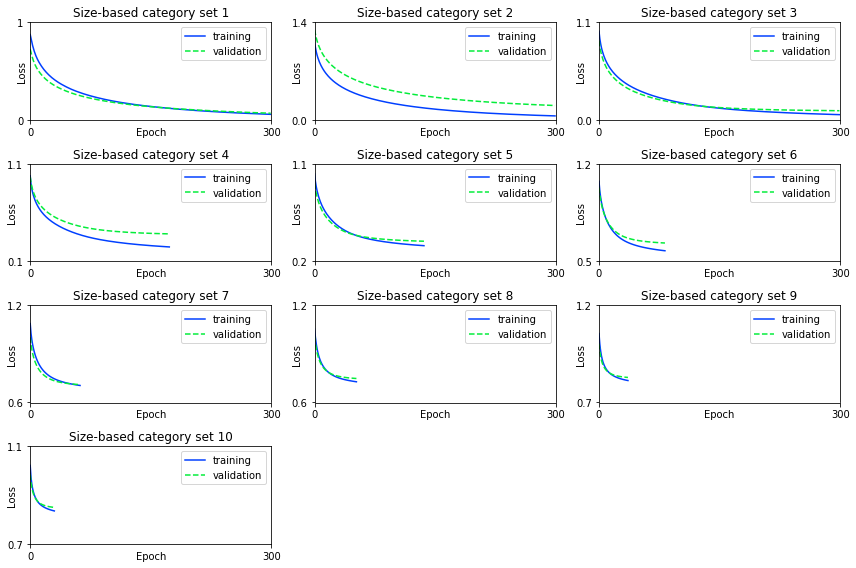

In [6]:
plot_training('size', 6, 'Size-based');

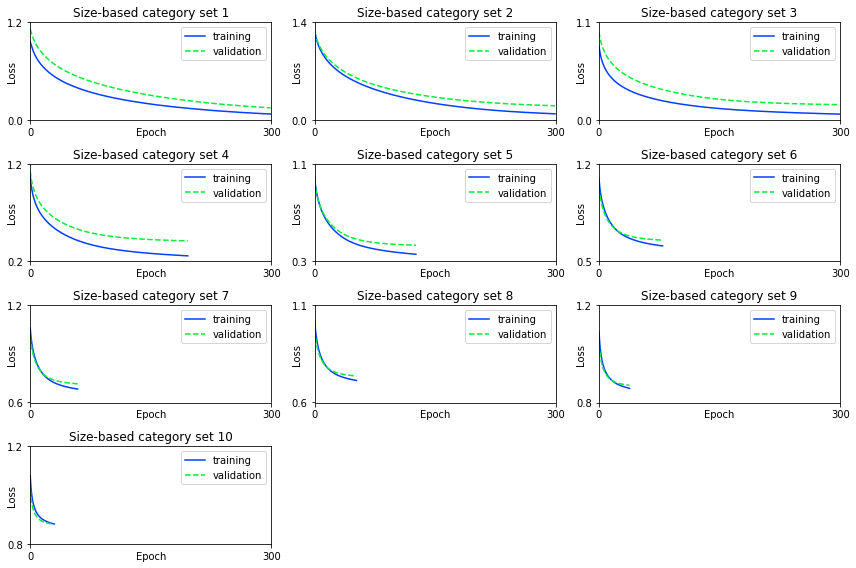

In [7]:
plot_training('size', 7, 'Size-based');

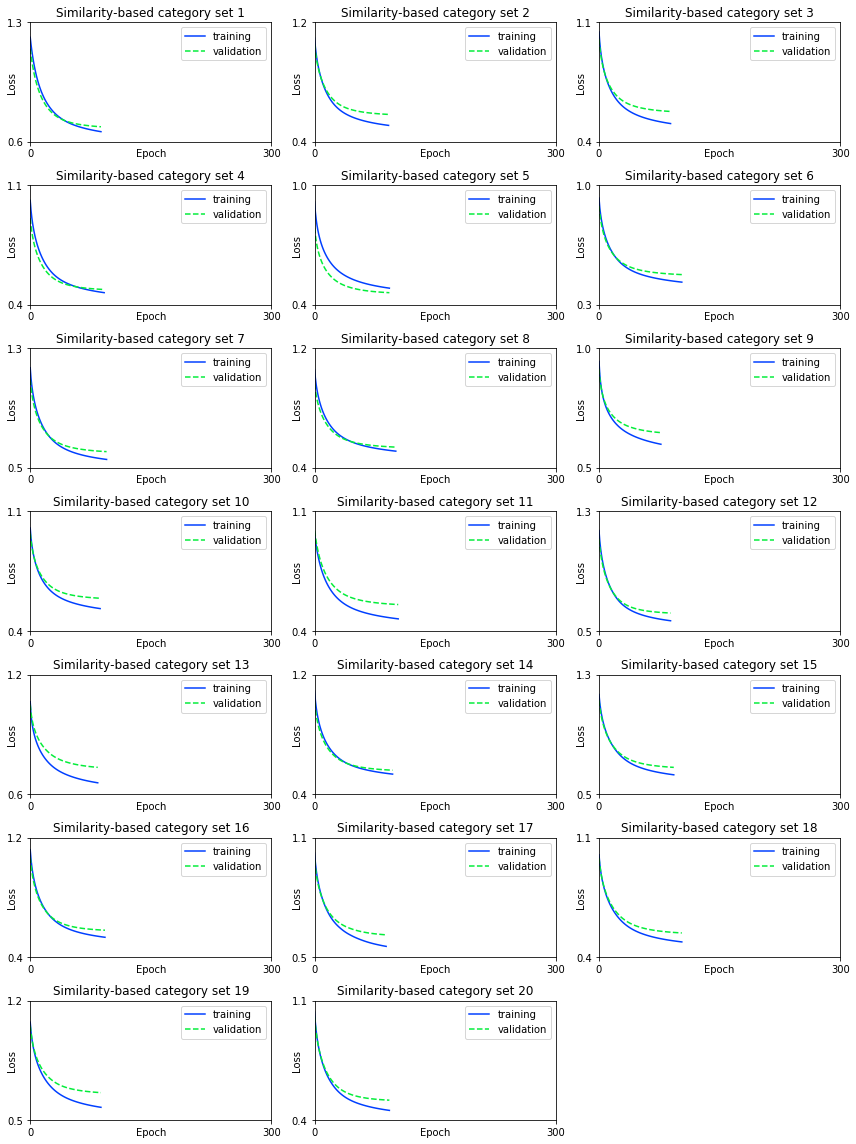

In [8]:
plot_training('sim', 3, 'Similarity-based');

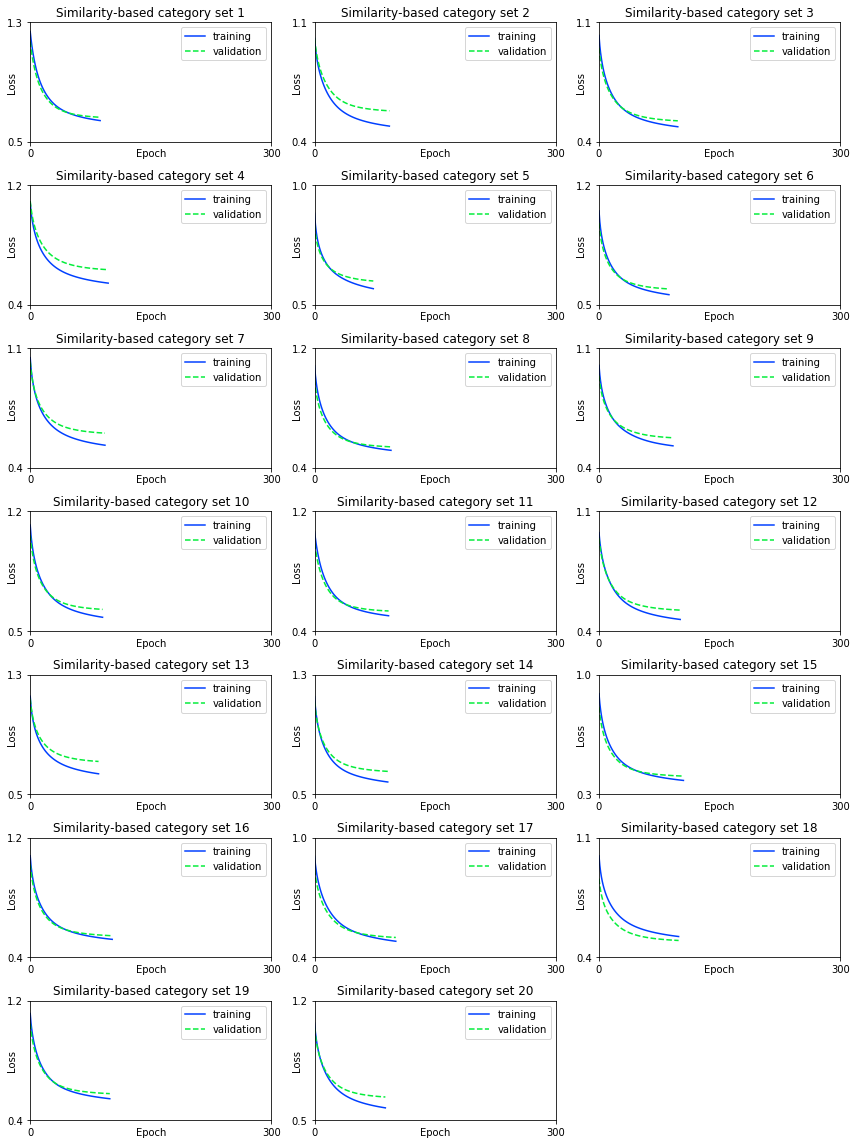

In [9]:
plot_training('sim', 4, 'Similarity-based');